In [1]:
from data_prep.v0 import get_data, preprocessed_dataset
from torch.utils.data import DataLoader
from engine.v0 import StepByStep 

In [2]:
train_loader, val_loader = get_data()

25000


In [3]:
# %load model_config/v0.py
import torch
from torch import nn, optim
import torchvision
from torchvision.models import resnet18

device = 'cuda' if torch.cuda.is_available() else 'cpu'

weights = torchvision.models.ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)
#model.fc = nn.Sequential(nn.Linear(512, 1), nn.Sigmoid())
# freezing the model
for param in model.parameters():
    param.requires_grad = False

In [4]:
model.fc = nn.Sequential(nn.Linear(512, 1), nn.Sigmoid())

In [5]:
#train_preproc = preprocessed_dataset(model, train_loader)
#val_preproc = preprocessed_dataset(model, val_loader)
#train_proc_loader = DataLoader(train_preproc, batch_size=224, shuffle=True)
#val_proc_loader = DataLoader(val_preproc, batch_size=224)

In [6]:
torch.manual_seed(42)
#top_model = nn.Sequential(nn.Linear(512, 1), nn.Sigmoid())
loss_fn = nn.BCELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=3e-4)
sbs = StepByStep(model, loss_fn, optimizer)

In [7]:
sbs.set_loaders(train_loader, val_loader)
sbs.train(10)

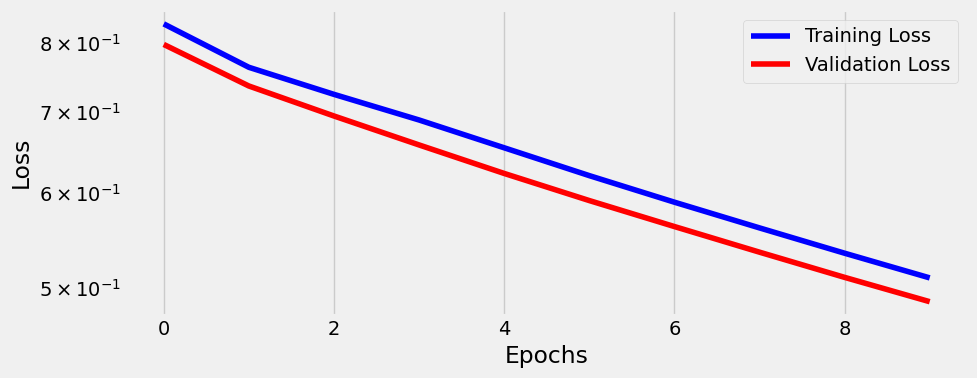

In [8]:
fig = sbs.plot_losses()